<a href="https://colab.research.google.com/github/divya-r-kamat/case-studies/blob/master/MissingValue_Imputation_using_Feature_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### What is Feature-Engine

Feature-Engine is an open source python package created by ***Soledad Galli*** the author of the wonderful course https://www.udemy.com/course/feature-engineering-for-machine-learning/

- Feature-Engine includes all the feature engineering techniques 
- Feature-Engine works like to Scikit-learn, so it is easy to learn
- Feature-Engine allows you to implement specific engineering steps to specific feature subsets
- Feature-Engine can be integrated with the Scikit-learn pipeline allowing for smooth model building


**Feature-Engine allows you to design and store a feature engineering pipeline with bespoke procedures for different variable groups.**

-------------------------------------------------------------------
Feature-Engine can be installed via pip ==> pip install feature-engine

In [ ]:
!pip install feature-engine

     |████████████████████████████████| 8.7MB 5.5MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [ ]:
!cp "/content/drive/My Drive/houseprice.csv" .

# we are going to use only the following variables,
# 3 of which contain NA

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)

data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [ ]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [ ]:
# we call the imputer from feature-engine
# we specify the imputation strategy, median in this case

imputer = mdi.MeanMedianImputer(imputation_method='median')

In [ ]:
# we fit the imputer

imputer.fit(X_train)

MeanMedianImputer(imputation_method='median',
                  variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [ ]:
# we see that the imputer found the numerical variables to
# impute with the mean
imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# here we can see the mean assigned to each variable
imputer.imputer_dict_

{'GarageYrBlt': 1979.0, 'LotFrontage': 69.0, 'MasVnrArea': 0.0}

In [ ]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,69.0,573.0,1998.0
682,Gd,Gd,69.0,0.0,1996.0
960,TA,NaN,50.0,0.0,1979.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


In [ ]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

## Feature-Engine allows you to specify variable groups easily


In [ ]:
# let's do mean imputation this time
# and let's do it over 2 of the 3 numerical variables

imputer = mdi.MeanMedianImputer(imputation_method='mean',
                                variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean',
                  variables=['LotFrontage', 'MasVnrArea'])

In [ ]:
# now the imputer uses only the variables we indicated

imputer.variables

['LotFrontage', 'MasVnrArea']

In [ ]:
# and we can see the value assigned to each variable
imputer.imputer_dict_

{'LotFrontage': 69.66866746698679, 'MasVnrArea': 103.55358898721731}

In [ ]:
# let's corroborate that the dictionary above contains
# the mean values of th variables

X_train[imputer.variables].mean()

LotFrontage     69.668667
MasVnrArea     103.553589
dtype: float64

In [ ]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Feature-Engine can be used with the Scikit-learn pipeline


In [ ]:
pipe = Pipeline([
    ('median_imputer', mdi.MeanMedianImputer(imputation_method='median',
                                             variables = ['LotFrontage', 'GarageYrBlt'])),
     
    ('mean_imputer', mdi.MeanMedianImputer(imputation_method='mean',
                                          variables = ['MasVnrArea'])),
     ])

In [ ]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('median_imputer',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['LotFrontage', 'GarageYrBlt'])),
                ('mean_imputer',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['MasVnrArea']))],
         verbose=False)

In [ ]:
pipe.named_steps['median_imputer'].imputer_dict_

{'GarageYrBlt': 1979.0, 'LotFrontage': 69.0}

In [ ]:
pipe.named_steps['mean_imputer'].imputer_dict_

{'MasVnrArea': 103.55358898721731}

In [ ]:
# let's transform the data with the pipeline
tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64

## Arbitrary Imputation ==> Feature-Engine

In [ ]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [ ]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [ ]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [ ]:
# we call the imputer from feature-engine
# we specify the arbitrary value as an argument

imputer = mdi.ArbitraryNumberImputer(arbitrary_number = -999)

In [ ]:
# we fit the imputer

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [ ]:
# we see that the imputer found the numerical variables to
# impute with the arbitrary value

imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# here we can see the arbitrary value stored
imputer.arbitrary_number

-999

In [ ]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,-999.0,573.0,1998.0
682,Gd,Gd,-999.0,0.0,1996.0
960,TA,NaN,50.0,0.0,-999.0
1384,TA,NaN,60.0,0.0,1939.0
1100,TA,NaN,60.0,0.0,1930.0


In [ ]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

In [ ]:
# let's do it imputation but this time
# and let's do it over 2 of the 3 numerical variables

imputer = mdi.ArbitraryNumberImputer(arbitrary_number = -999,
                                     variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=-999,
                       variables=['LotFrontage', 'MasVnrArea'])

In [ ]:
# now the imputer uses only the variables we indicated

imputer.variables

['LotFrontage', 'MasVnrArea']

In [ ]:
# and we can see the value assigned to each variable
imputer.arbitrary_number

-999

In [ ]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fc7b76278>,
      dtype=object)

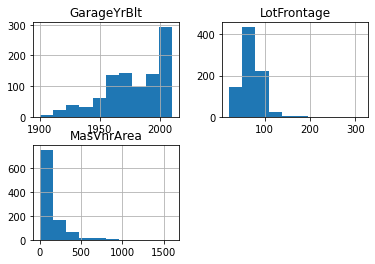

In [ ]:
# let's look at the distributions to determine the
# arbitraty values to use

X_train.hist()

In [ ]:
pipe = Pipeline([
    ('imputer_999', mdi.ArbitraryNumberImputer(arbitrary_number = -999,
                                             variables = ['LotFrontage', 'MasVnrArea'])),
     
    ('imputer_minus1', mdi.ArbitraryNumberImputer(arbitrary_number = -1,
                                          variables = ['GarageYrBlt'])),
     ])

In [ ]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer_999',
                 ArbitraryNumberImputer(arbitrary_number=-999,
                                        variables=['LotFrontage',
                                                   'MasVnrArea'])),
                ('imputer_minus1',
                 ArbitraryNumberImputer(arbitrary_number=-1,
                                        variables=['GarageYrBlt']))],
         verbose=False)

In [ ]:
pipe.named_steps['imputer_999'].arbitrary_number

-999

In [ ]:
pipe.named_steps['imputer_minus1'].arbitrary_number

-1

In [ ]:
# let's transform the data with the pipeline
tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64

## End of distribution Imputation ==> Feature-Engine

In [ ]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi

In [ ]:
# let's load the dataset with a selected group of variables

cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

data = pd.read_csv('houseprice.csv', usecols=cols_to_use)
data.head()

,LotFrontage,MasVnrArea,BsmtQual,FireplaceQu,GarageYrBlt,SalePrice
0,65.0,196.0,Gd,NaN,2003.0,208500
1,80.0,0.0,Gd,TA,1976.0,181500
2,68.0,162.0,Gd,TA,2001.0,223500
3,60.0,0.0,TA,Gd,1998.0,140000
4,84.0,350.0,Gd,TA,2000.0,250000


In [ ]:
data.isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
BsmtQual       0.025342
FireplaceQu    0.472603
GarageYrBlt    0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
# let's separate into training and testing set

# first drop the target from the feature list
cols_to_use.remove('SalePrice')

X_train, X_test, y_train, y_test = train_test_split(data[cols_to_use],
                                                    data['SalePrice'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((1022, 5), (438, 5))

In [ ]:
# we call the imputer from feature-engine

# we specify whether we want to find the values using
# the gaussian approximation or the inter-quantal range
# proximity rule.

# in addition we need to specify if we want the values placed at 
# the left or right tail

imputer = mdi.EndTailImputer(distribution='gaussian', tail='right')

In [ ]:
# we fit the imputer

imputer.fit(X_train)

EndTailImputer(distribution='gaussian', fold=3, tail='right',
               variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])

In [ ]:
# we see that the imputer found the numerical variables to
# impute with the end of distribution value

imputer.variables

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [ ]:
# here we can see the values that will be used
# to replace NA for each variable

imputer.imputer_dict_

{'GarageYrBlt': 2052.9707419772235,
 'LotFrontage': 138.9022201686726,
 'MasVnrArea': 648.3947111415157}

In [ ]:
# and this is how those values were calculated
# which is how we learnt in the first notebooks of
# this section

X_train[imputer.variables].mean() + 3 * X_train[imputer.variables].std()

LotFrontage     138.902220
MasVnrArea      648.394711
GarageYrBlt    2052.970742
dtype: float64

In [ ]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)
tmp.head()

,BsmtQual,FireplaceQu,LotFrontage,MasVnrArea,GarageYrBlt
64,Gd,NaN,138.90222,573.0,1998.000000
682,Gd,Gd,138.90222,0.0,1996.000000
960,TA,NaN,50.00000,0.0,2052.970742
1384,TA,NaN,60.00000,0.0,1939.000000
1100,TA,NaN,60.00000,0.0,1930.000000


In [ ]:
# let's check that the numerical variables don't
# contain NA any more

tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
GarageYrBlt    0.0
dtype: float64

In [ ]:
# let's do it imputation but this time
# and let's do it over 2 of the 3 numerival variables

# let's also select the proximity rule on the left tail

imputer = mdi.EndTailImputer(distribution='skewed', tail='left',
                             variables=['LotFrontage', 'MasVnrArea'])

imputer.fit(X_train)

EndTailImputer(distribution='skewed', fold=3, tail='left',
               variables=['LotFrontage', 'MasVnrArea'])

In [ ]:
# now the imputer uses only the variables we indicated

imputer.variables

['LotFrontage', 'MasVnrArea']

In [ ]:
# and we can see the value assigned to each variable
imputer.imputer_dict_

{'LotFrontage': -8.0, 'MasVnrArea': -510.0}

In [ ]:
# feature-engine returns a dataframe

tmp = imputer.transform(X_train)

# let's check null values are gone
tmp[imputer.variables].isnull().mean()

LotFrontage    0.0
MasVnrArea     0.0
dtype: float64

## Pipeline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fc72a02b0>,
      dtype=object)

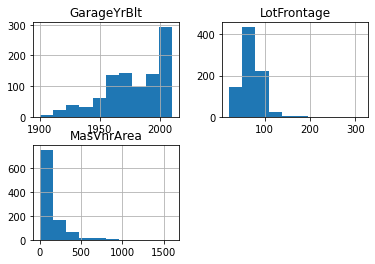

In [ ]:
# let's look at the distributions to determine the
# end tail value selection method

X_train.hist()

All variables are skewed. For this demo, we will use the proximity rule for GarageYrBlt and MasVnrArea, and the Gaussian approximation for LotFrontage

In [ ]:
pipe = Pipeline([
    ('imputer_skewed', mdi.EndTailImputer(distribution='skewed', tail='right',
                                          variables=['GarageYrBlt', 'MasVnrArea'])),

    ('imputer_gaussian', mdi.EndTailImputer(distribution='gaussian', tail='right',
                                            variables=['LotFrontage'])),
])

In [ ]:
pipe.fit(X_train)

Pipeline(memory=None,
         steps=[('imputer_skewed',
                 EndTailImputer(distribution='skewed', fold=3, tail='right',
                                variables=['GarageYrBlt', 'MasVnrArea'])),
                ('imputer_gaussian',
                 EndTailImputer(distribution='gaussian', fold=3, tail='right',
                                variables=['LotFrontage']))],
         verbose=False)

In [ ]:
pipe.named_steps['imputer_skewed'].imputer_dict_

{'GarageYrBlt': 2121.0, 'MasVnrArea': 680.0}

In [ ]:
pipe.named_steps['imputer_gaussian'].imputer_dict_

{'LotFrontage': 138.9022201686726}

In [ ]:
# let's transform the data with the pipeline
tmp = pipe.transform(X_train)

# let's check null values are gone
tmp.isnull().mean()

BsmtQual       0.023483
FireplaceQu    0.467710
LotFrontage    0.000000
MasVnrArea     0.000000
GarageYrBlt    0.000000
dtype: float64